In [75]:
import numpy as np
import matplotlib.pyplot as plt
from hlsf.models import LSF_DATA
from scipy import interpolate
%matplotlib inline

In [76]:
config = 'H'
lamp = 'Kr'

In [77]:
lsf_data = LSF_DATA(f"../exposures/ARC-{lamp}_CLEAR_20MAS_{config}_PRM.fits", f"../text/{lamp}.txt", f"../exposures/WAVECAL_TABLE_20MAS_{config}.fits", 
                        f"../exposures/SLITLET_TABLE_20MAS_{config}.fits", slice=10, normal='Normal')
lsf_data.get_line_list()

{171: 14402.22,
 172: 14426.793,
 173: 14517.84,
 174: 14734.436,
 177: 14961.894,
 178: 15005.307,
 179: 15209.526,
 180: 15239.615,
 183: 15372.037,
 184: 15474.026,
 185: 15681.02,
 186: 15820.09,
 187: 16726.513,
 188: 16785.128,
 189: 16853.488,
 192: 16935.806,
 193: 17098.771,
 194: 17367.606,
 195: 17404.443,
 196: 17616.854,
 197: 17842.737,
 198: 18002.229,
 199: 18167.315,
 200: 18399.786}

In [79]:
array_waves = np.empty(0, dtype=float)
array_intensity = np.empty(0, dtype=float)
array_pos = np.empty(0, dtype=float)
for nb_line in lsf_data.get_line_list().keys(): 
    data = lsf_data.get_data_line(nb_line, step=1)
    pos = data['map_wave']-data['waveline']
    intensity = data['intensity']
    array_pos = np.concatenate((array_pos, pos))
    array_waves = np.concatenate((array_waves, np.full_like(pos, data['waveline'])))
    array_intensity = np.concatenate((array_intensity, intensity))
array_intensity.shape

(17505,)

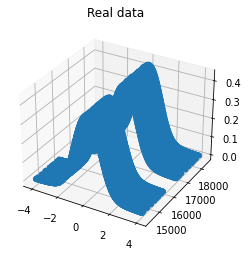

In [80]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(array_pos, array_waves, array_intensity)
plt.title('Real data')
plt.show()

In [81]:
x = np.arange(min(array_pos), max(array_pos), step=1e-2)
y = np.arange(min(array_waves), max(array_waves), step=50)
grid_x, grid_y = np.meshgrid(x, y)
grid_y.shape

(80, 818)

In [85]:
grid_z0 = interpolate.griddata(np.array([array_pos, array_waves]).T, array_intensity, (grid_x, grid_y), method='nearest')
grid_z0

array([[0.0024048 , 0.00240436, 0.00243413, ..., 0.00280271, 0.00278374,
        0.00276401],
       [0.00239562, 0.0023972 , 0.00243743, ..., 0.00279157, 0.00277822,
        0.00277824],
       [0.00241939, 0.00245467, 0.00243472, ..., 0.00284649, 0.00281662,
        0.00281662],
       ...,
       [0.00278772, 0.00282835, 0.00283803, ..., 0.00341875, 0.00337371,
        0.00337371],
       [0.00285912, 0.00288787, 0.00290547, ..., 0.00342044, 0.00337164,
        0.00337164],
       [0.00285912, 0.00288787, 0.00290547, ..., 0.00342044, 0.00337164,
        0.00337164]])

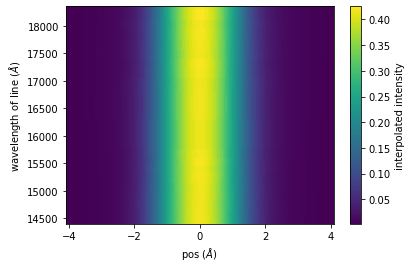

In [86]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel(r'pos ($\AA$)')
ax.set_ylabel(r'wavelength of line ($\AA$)')
c = ax.pcolormesh(x, y, grid_z0[:-1, :-1])
plt.colorbar(c, ax=ax, label='interpolated intensity')
plt.show()

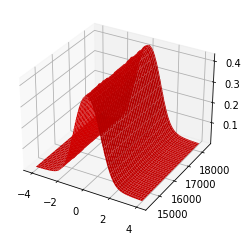

In [89]:
fig = plt.figure()
ax = plt.axes(projection='3d')
c = ax.plot_surface(grid_x, grid_y, grid_z0, color='red', edgecolor='none')
plt.show()